In [1]:
import pandas as pd
import numpy as np
import io
import os
import matplotlib.pyplot as plt

In [2]:
PLOT_DIR = "/home/nathan/data/alloc-test-new/"

In [3]:
# rewrite above code as a function taking the filename as an argument
def read_malloc_output(filename):
    # if file does not exist return empty dataframe
    if not os.path.isfile(filename):
        return None

    with open(filename, "r") as file:
        output_text = file.read()

    start_marker = "columns:"
    start_index = output_text.find(start_marker) + len(start_marker)
    table_text = output_text[start_index:]

    # read csv into pandas dataframe, first row is column names
    df = pd.read_csv(io.StringIO(table_text), header=None, delimiter=",", skipinitialspace=True)

    # set column names from first row
    df.columns = list(df.iloc[0, 0::1])
    # drop first row    
    df = df.iloc[1:, 0::1]

    # convert all columns to numeric values
    df = df.apply(pd.to_numeric)
    # display(df)
    return df


Text(0, 0.5, 'RSS max / max size allocated')

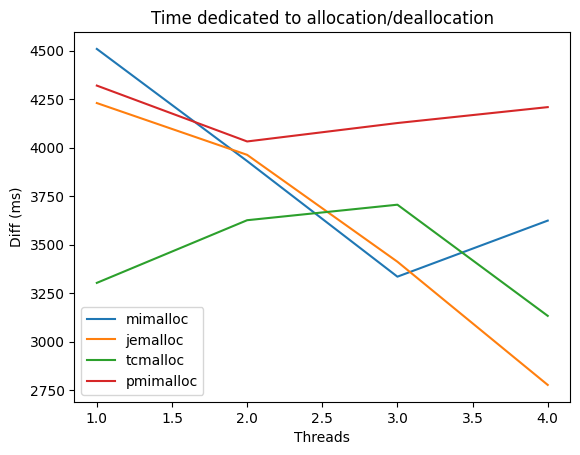

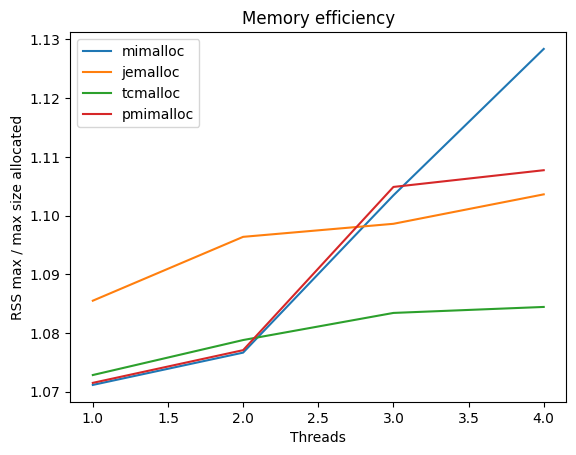

In [8]:
results = {}
results["mimalloc"]          = read_malloc_output(PLOT_DIR + "test_mimalloc.txt"  )
results["jemalloc"]          = read_malloc_output(PLOT_DIR + "test_jemalloc.txt"  )
results["tcmalloc"]          = read_malloc_output(PLOT_DIR + "test_tcmalloc.txt"  )
results["fancy std::malloc"] = read_malloc_output(PLOT_DIR + "test_tfmalloc.txt"  )
# results["hwmalloc"]          = read_malloc_output(PLOT_DIR + "test_hwmalloc.txt"  )
# results["std::malloc"]       = read_malloc_output(PLOT_DIR + "test_stdmalloc.txt" )
# results["umpire"]            = read_malloc_output(PLOT_DIR + "test_tspumalloc.txt")
# results["hoard"]             = read_malloc_output(PLOT_DIR + "test_hoardmalloc.txt" )
results["pmimalloc"]         = read_malloc_output(PLOT_DIR + "test_pmimalloc.txt" )

# create empty dataframe 
diff   = pd.DataFrame()
memory = pd.DataFrame()
dur    = pd.DataFrame()

for name, df in results.items():
    if df is not None:
        dur = pd.concat([dur, df["duration(ms)"]], axis = 1)
        dur.rename(columns = {"duration(ms)": name}, inplace = True)
        
for name, df in results.items():
    if df is not None:
        diff = pd.concat([diff, df["diff(ms)"]], axis = 1)
        diff.rename(columns = {"diff(ms)": name}, inplace = True)
        
for name, df in results.items():
    if df is not None:
        memory = pd.concat([memory, df["(RSS max<<12)/allocatedMax"]], axis = 1)
        memory.rename(columns = {"(RSS max<<12)/allocatedMax": name}, inplace = True)
        
# # display(abs time)
# plt_dur = dur.plot(title = 'Absolute time dedicated to the test')
# plt_dur.set_xlabel("Threads")
# plt_dur.set_ylabel("Duration (ms)")     


# display(diff)
plt_diff = diff.plot(title = 'Time dedicated to allocation/deallocation')
plt_diff.set_xlabel("Threads")
plt_diff.set_ylabel("Diff (ms)")


# display(memory)
plt_memory = memory.plot(title = 'Memory efficiency')
plt_memory.set_xlabel("Threads")
plt_memory.set_ylabel("RSS max / max size allocated")